# Laboratory 06: Fully Connected Neural Networks

In this laboratory you are going to build your own deep neural network using fully connected layers in PyTorch. You are going to walk through all the steps necessary to build and train the neural network such that in can correctly classify fashion items. All the imports required for the implementation have been done for you below.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style


So, without further ado let's put your knowledge to the test :)

**Note:** To make things predictible across multiple runs you may want to use `torch.manual_seed(...)`.

## Exercise 1 - The ETL Again

Implement an simple ETL process by using FashionMNIST data set and PyTorch functionality with the following steps:

1. Create a transform object that contains a normalization transformation with $\mu = 0.5$ and $\sigma = 0.5$.
2. Create instances of the FashionMNIST *training set* in `train_set`  and *test set* in `test_set` with a corresponding loader objects: `train_loader` and `test_loader`.
3. Use the objects created to print the test and train dataset: lengths, targets bincount, the shape of image batch and the the shape of targets in the batch.
4. Plot a grid of images in the first batch with 10 images per row.

**Note:** You can use any batch size you want. But, I recommend that you use a value that is greater or equal to 32 and also shuffle you data.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


60000
60000
tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])
torch.Size([64, 1, 28, 28])
torch.Size([64])
10000
10000
tensor([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])
torch.Size([64, 1, 28, 28])
torch.Size([64])


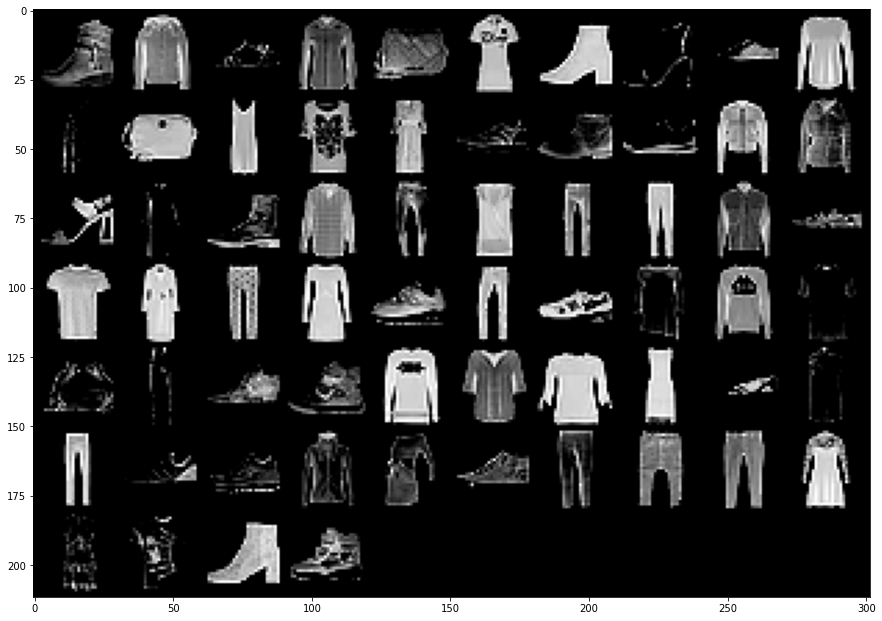

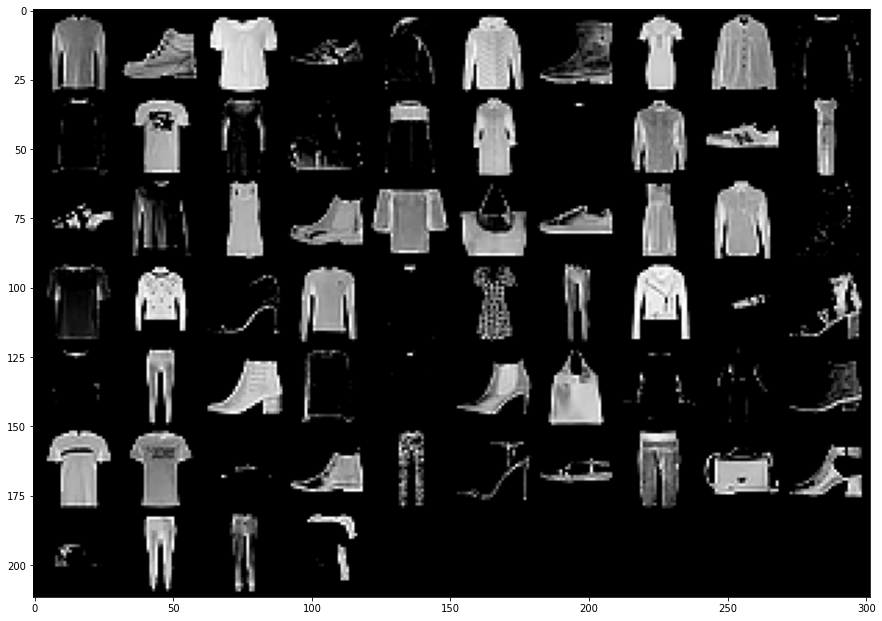

In [ ]:
torch.manual_seed(21)

# TODO 1.1 Define a transform to normalize the data with mean 0.5 and std. 0.5
transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize(0.5, 0.5)
])

# TODO 1.2 Download and load the FashionMNIST training/test data
#   - root='./datasets/'
#   - batch_size=64
#   - shuffle=true
train_set = datasets.FashionMNIST(root = './datasets/', train = True, transform = transform, download = True)
test_set = datasets.FashionMNIST(root = './datasets/', train = False, transform = transform, download = True)

train_loader = torch.utils.data.DataLoader(train_set, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 64, shuffle = True)

# TODO 1.3 Print information tensor information: len/ bincount / shape
print(len(train_set))
print(len(train_set.targets))
print(train_set.targets.bincount())
images, labels = next(iter(train_loader))
print(images.shape)
print(labels.shape)
grid = torchvision.utils.make_grid(images, nrow = 10)
plt.figure(figsize = (15, 15))
plt.imshow(grid.permute(1, 2, 0))

print(len(test_set))
print(len(test_set.targets))
print(test_set.targets.bincount())
images, labels = next(iter(test_loader))
print(images.shape)
print(labels.shape)
grid = torchvision.utils.make_grid(images, nrow = 10)
plt.figure(figsize = (15, 15))
plt.imshow(grid.permute(1, 2, 0))

## Exercise 2 - Building an FC-Network Model

Build a the neural network architecture presented in the Figure below by extending nn.Module class.


<img src="res/fashion-nn.png" width=600px>

1. Implement the neural net constructor
2. Implement the forward method using the log softmax probabilities



In [ ]:
class Network(nn.Module):
    # TODO 2.1. Implement the NN constructor
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features = 784, out_features = 256)
        self.fc2 = nn.Linear(in_features = 256, out_features = 128)
        self.fc3 = nn.Linear(in_features = 128, out_features = 64)
        self.fc4 = nn.Linear(in_features = 64, out_features = 10)
        
    # TODO 2.2. Implement the forward method
    def forward(self, x):
        # make sure input tensor is flattened
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.softmax(self.fc4(x), dim = 1)
        
        return x

## Exercise 3 - Training Your Model

As in the class notes in oreder to train the model we need four main components:
- the dataloader which we already created in exercise 1
- an instance of our model from the class we have implemented in exercise 2
- a loss function appropiate to our model, here we will use the negative log loss, i.e. `NLLLoss()`
- an optimizier like SGD - here we will use Adam()

Aside from these components, we also have to chose hyperparameters such as the learning rate, number of epochs to train the model and so on. Here, we'll set only the two parameters, so we can focus our efforts mainly on implemeting the training loop guts. However, in general you'll want to customize some or all aspects with respect to training (e.g. initialization sheme of model parameters, batch size, number of skip connections, etc ...)

Ok, without further ado please follow the TODO's bellow to implement the training loop.

In [ ]:
# TODO 3.1. Instantiate the model
model = Network()

# TODO 3.2. Instantiate a negative log loss criterion
criterion = nn.NLLLoss()

# TODO 3.3. Instantiate an Adam optimizer with a 0.003
optimizer = optim.Adam(model.parameters(), lr = 0.003)

# Number of epochs in our training loop
epochs = 5

# The training loop 
for e in range(epochs):
    
    # running loss to keep track of the training evolution    
    running_loss = 0
    
    # Passing through batches inner loop
    for images, labels in train_loader:
        
        # TODO 3.4. Flatten images into a 784 long vector
        images = torch.flatten(images, start_dim = 1)

        # TODO 3.5. Reset the gradinets for this pass
        optimizer.zero_grad()
        
        # TODO 3.6. Compute the model's output predictions
        output = model(images)
        
        # TODO 3.7. Compute the loss for this pass
        loss = criterion(output, labels)
        
        # TODO 3.7. Compute the gradients using backprop.
        loss.backward()
        
        # TODO 3.8 Update the model weights
        optimizer.step()
        
        # Tracking the loss for this batch
        running_loss += loss.item()
        
    # The loss in this epoch
    print(f"Training loss: {running_loss / len(train_loader)}")

print("Done!")

Training loss: -0.42574271763851645
Training loss: -0.43131511300992864
Training loss: -0.32326958587428906
Training loss: -0.2836317477672339
Training loss: -0.27602296161340245
Done!


## Exercise 4 - A Better Model

Implement dropout to improve the neural network training:
1. Add dropout to each layer for each hidden layer with a 0.2 probability in the forward() method.
**Hint:** You can add a single dropout attribute to the model, i.e. `self.dropout = ...`, and use it where needed.

2. As before, train the new model while printing its training running loss to see if things improve.

In [ ]:
# TODO 4.1. Implement the new model with dropout
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features = 784, out_features = 256)
        self.fc2 = nn.Linear(in_features = 256, out_features = 128)
        self.fc3 = nn.Linear(in_features = 128, out_features = 64)
        self.fc4 = nn.Linear(in_features = 64, out_features = 10)

        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.dropout(torch.relu(self.fc2(x)))
        x = self.dropout(torch.relu(self.fc3(x)))
        x = torch.softmax(self.fc4(x), dim = 1)
        
        return x

In [ ]:
# TODO 4.2. Instatiate and train the new model while printing the running loss
model =  Network()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)

epochs = 5

# Your code goes here
for e in range(epochs):
  crt_loss = 0.0
  for images, labels in train_loader:
    optimizer.zero_grad()
    images = torch.flatten(images, start_dim = 1)
    output = model(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    crt_loss += loss.item()
  
  print(f"Training loss: {crt_loss/len(train_loader)}")

print("Done!")

Training loss: -0.49046215480133926
Training loss: -0.4843946123745904
Training loss: -0.46849263480095976
Training loss: -0.48054841866117043
Training loss: -0.4942715743393786
Done!
